In [1]:
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
import itertools

Using TensorFlow backend.
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\t

In [2]:
df = pd.read_csv('final.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,date,lat,lon,mask,lst,lstn,ndvi,vcr,prec,ma_cat
0,2019-06-02,39.737500,-122.295833,9.0,310.26000,290.921693,0.3108,0.59,0.718065,1
1,2019-06-10,39.737500,-122.295833,5.0,323.92000,290.921693,0.2526,0.59,0.000000,0
2,2019-06-18,39.737500,-122.295833,5.0,309.33877,297.900000,0.2526,0.59,0.000000,0
3,2019-06-02,39.729167,-122.295833,9.0,310.36000,290.921693,0.3198,0.57,0.718065,1
4,2019-06-10,39.729167,-122.295833,5.0,321.90000,290.921693,0.2670,0.57,0.000000,0


In [8]:
X = df[['vcr', 'lst','ndvi','lstn','prec']] .values
x=df[['vcr', 'lst','ndvi','lstn','prec']]
y = df['ma_cat'].values

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-3.63030991e-01,  1.63890259e-01, -7.74358640e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-3.63030991e-01,  2.59405503e+00, -1.12630579e+00,
        -1.65104665e-14, -5.90206435e-01],
       [-3.63030991e-01, -3.03379665e-14, -1.12630579e+00,
         2.02688551e+00, -5.90206435e-01],
       [-4.71069833e-01,  1.81680631e-01, -7.19933824e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-4.71069833e-01,  2.23468952e+00, -1.03922608e+00,
        -1.65104665e-14, -5.90206435e-01]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
1333/1333 [==============================] - 1s 590us/step - loss: 0.5131 - accuracy: 0.8927
Epoch 2/100
1333/1333 [==============================] - 0s 127us/step - loss: 0.2780 - accuracy: 0.9415
Epoch 3/100
1333/1333 [==============================] - 0s 128us/step - loss: 0.2301 - accuracy: 0.9415
Epoch 4/100
1333/1333 [==============================] - 0s 146us/step - loss: 0.2225 - accuracy: 0.9415
Epoch 5/100
1333/1333 [==============================] - 0s 168us/step - loss: 0.2199 - accuracy: 0.9415
Epoch 6/100
1333/1333 [==============================] - 0s 159us/step - loss: 0.2177 - accuracy: 0.9415
Epoch 7/100
1333/1333 [==============================] - 0s 217us/step - loss: 0.2164 - accuracy: 0.9415
Epoch 8/100
1333/1333 [==============================] - 0s 176us/step - loss: 0.2146 - accuracy: 0.9415
Epoch 9/100
1333/1333 [==============================] - 0s 176us/step - loss: 0.2139 - accuracy: 0.9415
Epoch 10/100
1333/1333 [==============================

Epoch 76/100
1333/1333 [==============================] - 0s 131us/step - loss: 0.1790 - accuracy: 0.9430
Epoch 77/100
1333/1333 [==============================] - 0s 132us/step - loss: 0.1786 - accuracy: 0.9422
Epoch 78/100
1333/1333 [==============================] - 0s 133us/step - loss: 0.1774 - accuracy: 0.9430
Epoch 79/100
1333/1333 [==============================] - 0s 129us/step - loss: 0.1772 - accuracy: 0.94300s - loss: 0.1697 - accuracy: 0.
Epoch 80/100
1333/1333 [==============================] - 0s 125us/step - loss: 0.1772 - accuracy: 0.9422
Epoch 81/100
1333/1333 [==============================] - 0s 123us/step - loss: 0.1760 - accuracy: 0.9452
Epoch 82/100
1333/1333 [==============================] - 0s 139us/step - loss: 0.1756 - accuracy: 0.9460
Epoch 83/100
1333/1333 [==============================] - 0s 173us/step - loss: 0.1769 - accuracy: 0.9430
Epoch 84/100
1333/1333 [==============================] - 0s 169us/step - loss: 0.1752 - accuracy: 0.9445
Epoch 85/100
1

In [15]:
y_pred = model.predict(X_test)

In [20]:
y_pred = np.round(y_pred,decimals=0)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9458041958041958


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       541
           1       0.00      0.00      0.00        31

    accuracy                           0.95       572
   macro avg       0.47      0.50      0.49       572
weighted avg       0.89      0.95      0.92       572



C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 14  17]
 [100 441]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

In [24]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [25]:
models = Sequential()
models.add(Dense(12, input_dim=5, activation='relu'))
models.add(Dense(8, activation='relu'))
models.add(Dense(1, activation='sigmoid'))

In [26]:
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
2510/2510 [==============================] - 0s 120us/step - loss: 0.5464 - accuracy: 0.7386
Epoch 2/100
2510/2510 [==============================] - 0s 121us/step - loss: 0.4839 - accuracy: 0.7629
Epoch 3/100
2510/2510 [==============================] - 0s 136us/step - loss: 0.4724 - accuracy: 0.7681
Epoch 4/100
2510/2510 [==============================] - 0s 124us/step - loss: 0.4629 - accuracy: 0.7725
Epoch 5/100
2510/2510 [==============================] - 0s 119us/step - loss: 0.4559 - accuracy: 0.7765
Epoch 6/100
2510/2510 [==============================] - 0s 139us/step - loss: 0.4501 - accuracy: 0.7793
Epoch 7/100
2510/2510 [==============================] - 0s 118us/step - loss: 0.4445 - accuracy: 0.7773
Epoch 8/100
2510/2510 [==============================] - 0s 118us/step - loss: 0.4419 - accuracy: 0.7837
Epoch 9/100
2510/2510 [==============================] - 0s 130us/step - loss: 0.4391 - accuracy: 0.7829
Epoch 10/100
2510/2510 [==============================]

2510/2510 [==============================] - 0s 131us/step - loss: 0.2974 - accuracy: 0.8657
Epoch 79/100
2510/2510 [==============================] - 0s 120us/step - loss: 0.2965 - accuracy: 0.8689
Epoch 80/100
2510/2510 [==============================] - 0s 123us/step - loss: 0.2964 - accuracy: 0.8657
Epoch 81/100
2510/2510 [==============================] - 0s 143us/step - loss: 0.2955 - accuracy: 0.8677
Epoch 82/100
2510/2510 [==============================] - 0s 118us/step - loss: 0.2945 - accuracy: 0.8689
Epoch 83/100
2510/2510 [==============================] - 0s 143us/step - loss: 0.2963 - accuracy: 0.8657
Epoch 84/100
2510/2510 [==============================] - 0s 140us/step - loss: 0.2953 - accuracy: 0.8693
Epoch 85/100
2510/2510 [==============================] - 0s 117us/step - loss: 0.2938 - accuracy: 0.8681
Epoch 86/100
2510/2510 [==============================] - 0s 123us/step - loss: 0.2938 - accuracy: 0.8689
Epoch 87/100
2510/2510 [==============================] - 0

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred = np.round(y_pred,decimals=0)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7954545454545454


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       541
           1       0.12      0.45      0.19        31

    accuracy                           0.80       572
   macro avg       0.54      0.63      0.54       572
weighted avg       0.92      0.80      0.85       572



Confusion matrix, without normalization
[[ 14  17]
 [100 441]]


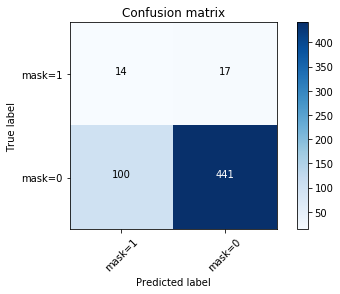

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')